# 패키지 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

# 데이터 불러오기

In [2]:
# ----------------------------------------
# 데이터를 불러와 데이터프레임을 만들고
# 상위 5개 행을 확인합니다.
# ----------------------------------------
df = pd.read_csv('C:/Users/EL087/Desktop/MS_MachineLearning/data/advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# 회귀 모델을 만드는 이유
- 실제 값이 있음에도 불구하고 데이터를 **훈련(Train)**과 **테스트(Test)**로 나누는 가장 중요한 목적:  
 모델이 새로운, 보지 못한 데이터에 대해 얼마나 잘 예측하는지를 평가하기 위함 <- 일반화 능력

 **1. 일반화 능력(Generalization) 확보**

 모델을 만드는 궁극적인 목표는 **현재 가지고 있는 데이터($y\_\text{actual}$)**를 정확히 맞추는 것이 아니라,   
 미래에 들어올 새로운 데이터를 정확하게 예측하는 것
 - 훈련 데이터: 모델에게 개념과 규칙을 가르치는 교재 역할
 - 테스트 데이터: 모델이 교재를 얼마나 잘 이해했는지 확인하는 시험 문제 역할  
 모델은 테스트 데이터를 단 한 번도 본 적이 없어야 객관적인 성능 측정이 가능

 **2. 과적합 (Overfitting) 방지**

 만약 훈련 데이터($y\_\text{train}$)로만 모델을 만들고 평가한다면, 모델은 데이터의 일반적인 패턴을 학습하는 것이 아니라,  
 훈련 데이터에 있는 세부적인 잡음(Noise)까지 외워버리는 현상이 발생 <- 과적합
 - 과적합 모델의 문제: 훈련 데이터에 대해서는 100%에 가까운 완벽한 예측($R^2 \approx 1$)을 보일 수 있지만,   
 새로운 데이터가 들어오면 성능이 급격히 떨어집니다.
 - 테스트 세트의 역할: 테스트 데이터를 사용하여 훈련된 모델의 성능을 측정하면,  
 모델이 훈련 데이터를 외우지 않고 진짜 패턴을 학습했는지 객관적으로 판단할 수 있습니다.

 **3. 요약: 데이터 분리의 목적**

 데이터를 분리하는 것은 모델이 현실 세계의 새로운 문제를 풀 수 있는지 검증하기 위한 필수적인 과정

 구분 | 목적 | 역할 |
| :--- | :--- | :--- |
| **훈련 데이터** (Training Data) | **모델 학습** (Model Training) | 독립변수 ($X$)와 종속변수 ($y$) 사이의 **관계(패턴)**를 찾도록 모델을 훈련 |
| **테스트 데이터** (Test Data) | **모델 평가** (Model Evaluation) | 훈련이 끝난 후, 모델의 **일반화 능력**을 객관적으로 측정하여 **실제 예측 성능**을 확인 |

# 단순선형회귀
* TV광고량에 따른 판매량 예측

## 독립변수, 종속변수 선택
* 독립변수는 2차원으로 다룹니다.

In [3]:
X = df[['TV']] # 독립변수가 여러 개이므로, 독립변수는 2차원이어야 함, 대문자인 이유는 1차원 데이터와 구분하기 위해
y = df['Sales']

## 훈련세트, 테스트세트 분할
* 모듈 : `model_selection`
* 함수 : `train_test_split`

In [4]:
# ------------------------------------------
# 훈련세트, 테스트세트 분할
# test_size 기본값은 0.25 (25%를 테스트용으로 사용)
# random_state를 설정하지 않으면 실행할 때마다 다른 결과가 나올 수 있음
# ------------------------------------------
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(150, 1) (50, 1) (150,) (50,)


- X (독립변수) / 특성 데이터 / 2차원 배열

    X_train.shape이 (150, 1)인 것은:

    행(Row): 150개의 관측치(데이터 샘플 수)

    열(Column): 1개의 특성(Feature, 이 경우 단순선형회귀이므로 1개)

<br>

- y (종속변수) / 타겟 데이터 / 1차원 배열

    y_train.shape이 (150,)인 것은:

    원소 수: 150개의 타겟 값

    뒤에 , 뒤에 숫자가 없는 것은 **1차원 배열(벡터)**이라는 의미입니다.

<br>

- random_state=42 로 고정하는 이유  

    random_state에 **42**라는 특정 정수를 지정하는 것은 **난수 발생기**의 **초기 시드(Seed)**를 고정한다는 의미

    random_state를 설정하지 않으면, 함수는 매번 **다른 난수(random number)**를 생성하여 데이터를 섞음  
    따라서 코드를 다시 실행할 때마다 데이터가 다르게 분리되어, 모델의 훈련 결과와 평가 지표(RMSE, $R^2$ 등)가 달라짐

    random_state를 설정하면, 코드를 몇 번을 실행하든 항상 동일한 순서로 데이터가 무작위로 섞이고 분리  
    **재현성 확보**: 모든 분석가가 동일한 코드를 실행할 때 같은 훈련 세트와 테스트 세트를 사용하게 되므로, 결과가 일관되게 나옴

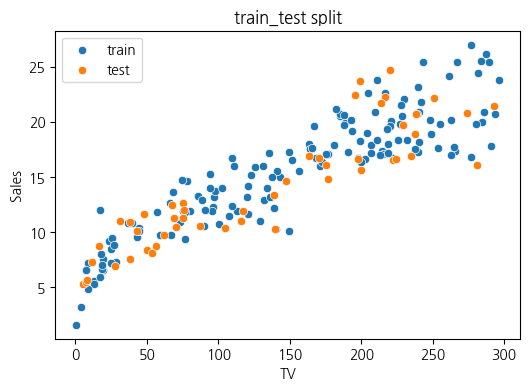

In [5]:
# ------------------------------------------
# 훈련세트, 테스트세트 분할 확인 시각화
# ------------------------------------------
plt.figure(figsize=(6,4))
sns.scatterplot(x=X_train['TV'], y=y_train, label="train")
sns.scatterplot(x=X_test['TV'], y=y_test, label="test")
plt.legend()
plt.title("train_test split")
plt.xlabel('TV');

## 모델 생성 및 훈련
* 선형회귀 모델
    * 모듈 : `linear_model`
    * 클래스 : `LinearRegression`

In [6]:
# ------------------------------------------
# LinearRegression 클래스 import
# ------------------------------------------
from sklearn.linear_model import LinearRegression   # LinearRegression은 알고리즘

# ------------------------------------------
# 모델객체 생성하기
# ------------------------------------------
model = LinearRegression()      # 아직 학습 전, 비어있는 모델

# ------------------------------------------
# 훈련데이터로 모델 훈련하기
# ------------------------------------------
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## 테스트세트로 평가


In [7]:
# ------------------------------------------
# 평가 방법 선택 : MSE, MAE, RMSE, R2
# ------------------------------------------
from sklearn.metrics import r2_score, \
                            root_mean_squared_error, \
                            mean_absolute_error, \
                            mean_squared_error

# ------------------------------------------
# 테스트 데이터의 예측값
#   y_pred
# ------------------------------------------
y_pred = model.predict(X_test)

# ------------------------------------------
# 모델 평가 
#   - 예측값과 실제값의 차이(Loss/Error) 이용
# ------------------------------------------
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('===단순선형회귀 모델의 평가결과===')
print(f'R2  : {r2:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MAE : {mae:.4f}')
print(f'MSE : {mse:.4f}')

===단순선형회귀 모델의 평가결과===
R2  : 0.7972
RMSE: 2.3481
MAE : 1.8651
MSE : 5.5134


1. **$R^2$ (결정 계수)**: 0.7972  

    $R^2$는 모델이 종속변수($Y$)의 **총 변동성(분산)**을 얼마나 잘 설명하는지를 나타냄
- 의미: $R^2$ 값이 0.7972라는 것은, 모델의 독립변수들이 종속변수 변화의 **약 79.72%**를 설명하고 있다는 뜻
- 평가: 1에 가까울수록 모델의 설명력이 높다고 평가하며, 0.7972는 비교적 높은 설명력으로 모델이 데이터를 잘 나타내고 있음을 시사

2. **RMSE (평균 제곱근 오차)**: 2.3481  

    RMSE는 예측값과 실제값 사이의 차이(오차)를 제곱한 후 평균 내고 다시 제곱근을 취한 값
- 의미: 예측 오차의 평균적인 크기가 2.3481 단위라는 뜻 (종속변수 $Y$와 동일한 단위를 가짐)
- 특징: 오차를 제곱하기 때문에 **큰 오차(이상치)**에 가중치를 두어 더 민감하게 반응  
        따라서 모델이 큰 예측 실수를 했을 경우 MSE나 RMSE가 급격히 커짐

3. **MAE (평균 절대 오차)**: 1.8651

    MAE는 예측값과 실제값 사이의 절대적인 차이를 평균 낸 값
- 의미: 예측값과 실제값의 평균적인 차이가 1.8651 단위라는 뜻 (종속변수 $Y$와 동일한 단위를 가짐)
- 특징: 오차의 크기에 비례하여 패널티를 부여하므로, 이상치에 덜 민감하며 RMSE보다 직관적으로 이해하기 쉬움

4. **MSE (평균 제곱 오차)**: 5.5134

    MSE는 오차를 제곱한 값들의 평균
- 의미: 오차 제곱의 평균이 5.5134이며, RMSE를 제곱한 값과 같음 ($\text{RMSE}^2 = 2.3481^2 \approx 5.5135$)
- 특징: 오차의 단위가 제곱되어 해석이 어렵지만, 미분 가능하여 최적화 과정(모델 학습)에서 널리 사용됨

📝 **성능 요약**
- 이 모델은 종속변수의 변동성을 약 80% 가까이 설명하는 설명력이 좋은 모델 ($R^2=0.7972$)
- 일반적으로 예측의 평균 오차는 **약 1.87(MAE)**에서 2.35(RMSE) 단위 수준으로 발생하고 있음
- RMSE가 MAE보다 크다는 것은 (대부분의 경우 그렇지만), 모델이 가끔 큰 오차를 내는 데이터 포인트(이상치)가 포함되어 있음을 시사

In [8]:
# ------------------------------------------
# 실제값과 모델의 예측값 비교
# ------------------------------------------
df_pred = pd.DataFrame({'X_test':X_test['TV'], 
                        'y_test':y_test, 
                        'y_pred':y_pred})

df_pred['error'] = df_pred['y_test']-df_pred['y_pred']
df_pred.head(10)

,X_test,y_test,y_pred,error
95,163.3,16.9,16.143474,0.756526
15,195.4,22.4,17.921382,4.478618
30,292.9,21.4,23.321569,-1.921569
158,11.7,7.3,7.746876,-0.446876
128,220.3,24.7,19.300506,5.399494
115,75.1,12.6,11.258382,1.341618
69,216.8,22.3,19.106654,3.193346
170,50.0,8.4,9.868180,-1.468180
174,222.4,16.5,19.416818,-2.916818
45,175.1,16.1,16.797035,-0.697035


In [9]:
# ------------------------------------------
# 회귀모델의 평가점수 수동 계산
# ------------------------------------------
mae = abs(df_pred['error']).mean()
mse = np.square(df_pred['error']).mean()
rmse = np.sqrt(mse)

rss = np.square(df_pred['y_test'] - df_pred['y_pred']).sum()
tss = np.square(df_pred['y_test'] - df_pred['y_test'].mean()).sum()
r2 = 1 - (rss/tss)

print(f'r2:{r2:.4f}')
print(f'rmse:{rmse:.4f}')
print(f'mae:{mae:.4f}')
print(f'mse:{mse:.4f}')

r2:0.7972
rmse:2.3481
mae:1.8651
mse:5.5134


## 모델의 학습 결과

In [10]:
# -----------------------------------------
# 회귀계수, 절편, 회귀식
# -----------------------------------------
print(f'회귀계수:{model.coef_}')
print(f'절편:{model.intercept_}')
print(f'회귀식:{model.coef_[0]} * TV + {model.intercept_}')

회귀계수:[0.05538653]
절편:7.098853680118275
회귀식:0.05538653085519158 * TV + 7.098853680118275


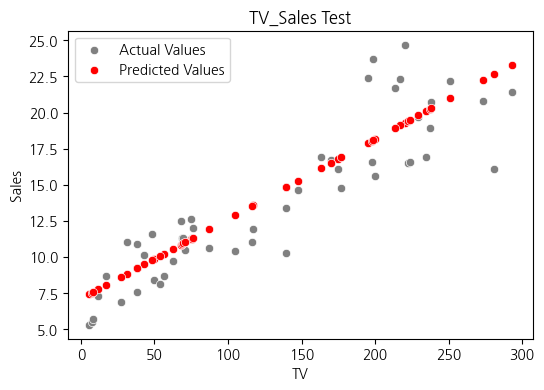

In [11]:
# ------------------------------------------
# 테스트데이터 실제값과 예측값 확인
# ------------------------------------------
plt.figure(figsize=(6,4))
sns.scatterplot(x=X_test['TV'], y=y_test, color='gray', label='Actual Values')  # 테스트데이터 실제값
sns.scatterplot(x=X_test['TV'], y=y_pred, color='red', label='Predicted Values')  # 테스트데이터 예측값
plt.xlabel('TV')
plt.title('TV_Sales Test')
pass

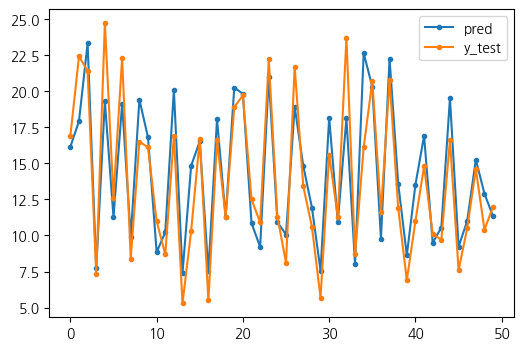

In [12]:
# ------------------------------------------
# 테스트데이터 실제값과 예측값 확인
# ------------------------------------------
plt.figure(figsize=(6,4))
plt.plot(y_pred, marker='.', label='pred')
plt.plot(np.array(y_test), marker='.', label='y_test')
plt.legend()
pass